In [1]:
#Import Packages
import numpy as np
import os
import pickle
from multicontact_learning_local_objectives.python.machine_learning.ml_utils import *
import matplotlib.pyplot as plt #Matplotlib
import shutil

print("Double check the Path for storing trajectories is correct")

Double check the Path for storing trajectories is correct


In [2]:
#Define Path for Storing Trajectories
#Collect Data Points Path
#workingDirectory = "/home/jiayu/Desktop/multicontact_learning_local_objectives/data/large_slope_flat_patches/"
#workingDirectory = "/home/jiayu/Desktop/MLP_DataSet/Rubbles_DaggerExact/"
#workingDirectory = "/home/jiayu/Desktop/MLP_DataSet/Rubbles_Add2Steps"
#workingDirectory = "/media/jiayu/Seagate/Rubbles_Add2Step_KeepOutlier"
#workingDirectory = "/media/jiayu/Seagate/Rubbles_AddVarSteps_1to2StepbeforeFail_RemovebyClip/"
#workingDirectory = "/media/jiayu/Seagate/Rubbles_Add2Steps_1StepbeforeFail_RemovebyClip/"
#workingDirectory = "/media/jiayu/Seagate/LargeSlope_Angle_17_26/"
workingDirectory = "/home/jiayu/Desktop/MLP_DataSet/TimeTrack_LargeSlopeOnly_Angle_17_26/"

#NOTE: need to have "/" at the end
print("Double Check we provide the Correct Traj Path: \n", workingDirectory)

#Define dataset folder
TrainingSetPath = [workingDirectory + "/DataSet/"+"Training_AllSet"]

# TrainingSetPath = [workingDirectory + "/DataSet/"+"TrainingSet_Initial",
#                    workingDirectory + "/DataSet/"+"TrainingAug2Steps_1StepbeforeFail_1Time_RemovebyClip",]

# TrainingSetPath = [workingDirectory + "/DataSet/"+"TrainingSet",
#                    workingDirectory + "/DataSet/"+"Training_Aug_1StepBeforeFail_1Time",
#                    workingDirectory + "/DataSet/"+"Training_Aug_1StepBeforeFail_2Time",
#                    workingDirectory + "/DataSet/"+"Training_Aug_1StepBeforeFail_3Time"]

ValidationSetPath = workingDirectory + "/DataSet/"+"ValidationSet"
TestSetPath = workingDirectory + "/DataSet/"+"TestSet"

#Path to store ML Model, create one if we dont have
ML_Model_Path = workingDirectory + "/ML_Models/"
if not (os.path.isdir(ML_Model_Path)):
    os.mkdir(ML_Model_Path)


Double Check we provide the Correct Traj Path: 
 /home/jiayu/Desktop/MLP_DataSet/TimeTrack_LargeSlopeOnly_Angle_17_26/


In [3]:
#Learning Code
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.layers import Dropout

In [4]:
#Load DataSet File

#For training set
for trainingset_idx in range(len(TrainingSetPath)):
    trainingset_file = TrainingSetPath[trainingset_idx] + "/data"+'.p'
    trainingset = pickle.load(open(trainingset_file,"rb"))
    
    print("For dataset: ", trainingset_idx)
    print("DataSet Sizes: ")
    
    if trainingset_idx == 0:
        x_train = trainingset["input"]
        y_train = trainingset["output"]
    else:
        x_train = np.concatenate((x_train,trainingset["input"]),axis=0)
        y_train = np.concatenate((y_train,trainingset["output"]),axis=0)
    
    print(x_train.shape)
    print(y_train.shape)

    print("World Frame Shift: ", trainingset["Shift_World_Frame_Type"])
    print("Contact Location Representation Type: ",trainingset["Contact_Representation_Type"])
    print("Scaling Factor of Variables: ",trainingset["VectorScaleFactor"])
    print("Number of Preview Steps: ", trainingset["NumPreviewSteps"])
    print("Pre Process Mode: ",trainingset["PreProcessMode"])
    print(" ")

print("Final Data Set Size")
print(x_train.shape)
print(y_train.shape)
print(" ")

#For validation and Test

#Load Validation Set and Test Set
validationset_file = ValidationSetPath + "/data"+'.p'
validationset = pickle.load(open(validationset_file,"rb"))

testset_file = TestSetPath + "/data"+'.p'
testset = pickle.load(open(testset_file,"rb"))

x_valid = validationset["input"]
y_valid = validationset["output"]

x_test = testset["input"]
y_test = testset["output"]

print("Set Up for Validation Set")
print("World Frame Shift: ", validationset["Shift_World_Frame_Type"])
print("Contact Location Representation Type: ",validationset["Contact_Representation_Type"])
print("Scaling Factor of Variables: ",validationset["VectorScaleFactor"])
print("Number of Preview Steps: ", validationset["NumPreviewSteps"])
print("Pre Process Mode: ",validationset["PreProcessMode"])
print("Validation Set Size")
print(x_valid.shape)
print(y_valid.shape)
print(" ")

print(" ")

print("Set Up for Test Set")
print("World Frame Shift: ", testset["Shift_World_Frame_Type"])
print("Contact Location Representation Type: ",testset["Contact_Representation_Type"])
print("Scaling Factor of Variables: ",testset["VectorScaleFactor"])
print("Number of Preview Steps: ", testset["NumPreviewSteps"])
print("Pre Process Mode: ",testset["PreProcessMode"])
print("Test Set Size")
print(x_test.shape)
print(y_test.shape)
print(" ")

For dataset:  0
DataSet Sizes: 
(24234, 85)
(24234, 14)
World Frame Shift:  StanceFoot
Contact Location Representation Type:  FollowRectangelBorder
Scaling Factor of Variables:  1.0
Number of Preview Steps:  4
Pre Process Mode:  OriginalForm
 
Final Data Set Size
(24234, 85)
(24234, 14)
 
Set Up for Validation Set
World Frame Shift:  StanceFoot
Contact Location Representation Type:  FollowRectangelBorder
Scaling Factor of Variables:  1.0
Number of Preview Steps:  4
Pre Process Mode:  OriginalForm
Validation Set Size
(4800, 85)
(4800, 14)
 
 
Set Up for Test Set
World Frame Shift:  StanceFoot
Contact Location Representation Type:  FollowRectangelBorder
Scaling Factor of Variables:  1.0
Number of Preview Steps:  4
Pre Process Mode:  OriginalForm
Test Set Size
(4800, 85)
(4800, 14)
 


In [5]:
#Decide input and outpu dimensionality
d_in = x_train[0].shape[0]
print("input dim: ", d_in)
d_out = y_train[0].shape[0]
print("output dim:", d_out)
print(" ")

# #Double check with mean and std
# print("Inputs: ")
# print("Input Mean: ", x_train.mean(axis=0))
# print("Input Std: ", x_train.std(axis=0))
# print("Input Max: ", x_train.max(axis=0))
# print("Input Min: ", x_train.min(axis=0))
# print(" ")


# print("Output Mean: ", y_train.mean(axis=0))
# print("Output Std: ", y_train.std(axis=0))
# print("Output Max: ", y_train.max(axis=0))
# print("Output Min: ", y_train.min(axis=0))

# print("Final Data Set Size")
# print(x_train.shape)
# print(y_train.shape)

input dim:  85
output dim: 14
 


In [6]:
#Define learning model
# model = Sequential([
#     Dense(256, activation='relu', input_shape=(d_in,)),
#     Dense(256, activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(d_out)
# ])
# loss: 4.6886e-04 - val_loss: 5.4786e-04

# #True code
# model = Sequential([
#     Dense(256, activation='relu', input_shape=(d_in,)), #tanh
#     Dense(256, activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(d_out, activation='linear')
# ])

# #True code
# model = Sequential([
#     Dense(256, activation='relu', input_shape=(d_in,), kernel_regularizer='l1'), #tanh
#     Dense(256, activation='relu', kernel_regularizer='l1'),
#     Dense(256, activation='relu', kernel_regularizer='l1'),
#     Dense(256, activation='relu', kernel_regularizer='l1'),
#     Dense(d_out, activation='linear')
# ])

#True code
model = Sequential([
    Dense(256, activation='relu', input_shape=(d_in,), ), #tanh
    Dense(256, activation='relu', ),
    Dense(256, activation='relu', ),
    Dense(256, activation='relu', ),
    Dense(d_out, activation='linear')
])


In [7]:
#Train Learning Model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.00005), loss='mse') #0.0001

#history = model.fit(x_train, y_train, epochs = 50000, validation_split=0.0, batch_size = x_train.shape[0])
#history = model.fit(x_train, y_train, epochs = 3000, validation_split=0.0, batch_size = 1280) #1280
#Batch size = 1280 for remove outlier, 2560 for keep outlier
history = model.fit(x = x_train, y = y_train, epochs = 4500, batch_size = 1280, validation_data = (x_valid, y_valid),shuffle=True) #1280, 1000 epoch

Epoch 1/4500
19/19 [==============================] - 0s 11ms/step - loss: 0.1664 - val_loss: 0.1100
Epoch 2/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0781 - val_loss: 0.0478
Epoch 3/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0336 - val_loss: 0.0216
Epoch 4/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0193 - val_loss: 0.0163
Epoch 5/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0163 - val_loss: 0.0145
Epoch 6/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0149 - val_loss: 0.0135
Epoch 7/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0139 - val_loss: 0.0126
Epoch 8/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0130 - val_loss: 0.0119
Epoch 9/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0123 - val_loss: 0.0113
Epoch 10/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0118 - val_loss: 0.010

19/19 [==============================] - 0s 6ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 83/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 84/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 85/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 86/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 87/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 88/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 89/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 90/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 91/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0040 - val_loss: 0.0038
Epoc

19/19 [==============================] - 0s 6ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 163/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 164/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 165/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 166/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 167/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 168/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 169/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 170/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 171/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0032 - val_loss: 0.

19/19 [==============================] - 0s 6ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 243/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 244/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 245/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 246/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 247/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 248/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 249/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 250/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 251/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0028 - val_loss: 0.

19/19 [==============================] - 0s 6ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 323/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 324/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 325/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 326/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 327/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 328/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 329/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 330/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 331/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0025 - val_loss: 0.

19/19 [==============================] - 0s 6ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 403/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 404/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 405/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 406/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 407/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 408/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 409/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 410/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 411/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0024 - val_loss: 0.

19/19 [==============================] - 0s 6ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 483/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 484/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 485/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 486/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 487/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 488/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 489/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 490/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 491/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0022 - val_loss: 0.

19/19 [==============================] - 0s 6ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 563/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 564/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 565/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 566/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 567/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 568/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 569/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 570/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 571/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0021 - val_loss: 0.

19/19 [==============================] - 0s 6ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 643/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 644/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 645/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 646/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 647/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 648/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 649/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 650/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 651/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0020 - val_loss: 0.

19/19 [==============================] - 0s 6ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 723/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 724/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 725/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 726/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 727/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 728/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 729/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 730/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 731/4500
19/19 [==============================] - 0s 8ms/step - loss: 0.0019 - val_loss: 0.

19/19 [==============================] - 0s 6ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 803/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 804/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 805/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 806/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 807/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 808/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 809/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 810/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 811/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0019 - val_loss: 0.

19/19 [==============================] - 0s 7ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 883/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 884/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 885/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 886/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 887/4500
19/19 [==============================] - 0s 8ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 888/4500
19/19 [==============================] - 0s 8ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 889/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 890/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 891/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0018 - val_loss: 0.

19/19 [==============================] - 0s 6ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 963/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 964/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 965/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 966/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 967/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 968/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 969/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 970/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 971/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0018 - val_loss: 0.

19/19 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 1043/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 1044/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 1045/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 1046/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 1047/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 1048/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 1049/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 1050/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 1051/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0017 - val

19/19 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 1122/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 1123/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 1124/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 1125/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 1126/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 1127/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 1128/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 1129/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 1130/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0017 - val

19/19 [==============================] - 0s 6ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 1201/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 1202/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 1203/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 1204/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 1205/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 1206/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 1207/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 1208/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 1209/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0016 - val

19/19 [==============================] - 0s 6ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 1280/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 1281/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 1282/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 1283/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 1284/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 1285/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 1286/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 1287/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 1288/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0016 - val

19/19 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 1359/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 1360/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 1361/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 1362/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 1363/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 1364/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 1365/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 1366/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 1367/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0015 - val

19/19 [==============================] - 0s 7ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 1438/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 1439/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 1440/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 1441/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 1442/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 1443/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 1444/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 1445/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 1446/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0015 - val

19/19 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 1517/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 1518/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 1519/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 1520/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 1521/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 1522/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 1523/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 1524/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 1525/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0015 - val

19/19 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 1596/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 1597/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 1598/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 1599/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 1600/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 1601/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 1602/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 1603/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 1604/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0015 - val

19/19 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1675/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1676/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1677/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1678/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1679/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1680/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1681/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1682/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1683/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0014 - val

19/19 [==============================] - 0s 7ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1754/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1755/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1756/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1757/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1758/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1759/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1760/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1761/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1762/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0014 - val

19/19 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1833/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1834/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1835/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1836/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1837/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1838/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1839/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1840/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1841/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0014 - val

19/19 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1912/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1913/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1914/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1915/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1916/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1917/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1918/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1919/4500
19/19 [==============================] - 0s 8ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1920/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0014 - val

19/19 [==============================] - 0s 7ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1991/4500
19/19 [==============================] - 0s 9ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1992/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1993/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1994/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1995/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1996/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1997/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1998/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1999/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0013 - val

19/19 [==============================] - 0s 7ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 2070/4500
19/19 [==============================] - 0s 8ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 2071/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 2072/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 2073/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 2074/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 2075/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 2076/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 2077/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 2078/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0013 - val

19/19 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 2149/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 2150/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 2151/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 2152/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 2153/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 2154/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 2155/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 2156/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 2157/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0013 - val

19/19 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 2228/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 2229/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 2230/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 2231/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 2232/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 2233/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 2234/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 2235/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 2236/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0013 - val

19/19 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 2307/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 2308/4500
19/19 [==============================] - 0s 9ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 2309/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 2310/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 2311/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 2312/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 2313/4500
19/19 [==============================] - 0s 9ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 2314/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 2315/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0013 - val

19/19 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2386/4500
19/19 [==============================] - 0s 9ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 2387/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 2388/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2389/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2390/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2391/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2392/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2393/4500
19/19 [==============================] - 0s 8ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2394/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0012 - val

19/19 [==============================] - 0s 8ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2465/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2466/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2467/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2468/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2469/4500
19/19 [==============================] - 0s 9ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2470/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2471/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2472/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2473/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0012 - val

19/19 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2544/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2545/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2546/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2547/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2548/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2549/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2550/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2551/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2552/4500
19/19 [==============================] - 0s 9ms/step - loss: 0.0012 - val

19/19 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2623/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2624/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2625/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2626/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2627/4500
19/19 [==============================] - 0s 8ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2628/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2629/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2630/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2631/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0012 - val

19/19 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2702/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2703/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2704/4500
19/19 [==============================] - 0s 9ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2705/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2706/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2707/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2708/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2709/4500
19/19 [==============================] - 0s 8ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2710/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0012 - val

19/19 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2781/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2782/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2783/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2784/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2785/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2786/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2787/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2788/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2789/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0012 - val

19/19 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2860/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2861/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2862/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2863/4500
19/19 [==============================] - 0s 8ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2864/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2865/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2866/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2867/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2868/4500
19/19 [==============================] - 0s 9ms/step - loss: 0.0012 - val

19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 2939/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 2940/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 2941/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 2942/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 2943/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 2944/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 2945/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 2946/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 2947/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val

19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3018/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3019/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3020/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3021/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3022/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3023/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3024/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3025/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3026/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val

19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3097/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3098/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3099/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3100/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3101/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3102/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3103/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3104/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3105/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val

19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3176/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3177/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3178/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3179/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3180/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3181/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3182/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3183/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3184/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val

19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3255/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3256/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3257/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3258/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3259/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3260/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3261/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3262/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3263/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val

19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3334/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3335/4500
19/19 [==============================] - 0s 9ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3336/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3337/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3338/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3339/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3340/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3341/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3342/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0011 - val

19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3413/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3414/4500
19/19 [==============================] - 0s 9ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3415/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3416/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3417/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3418/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3419/4500
19/19 [==============================] - 0s 8ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3420/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3421/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val

19/19 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 3492/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3493/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3494/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3495/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3496/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3497/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3498/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3499/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3500/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val

19/19 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 3571/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3572/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 3573/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 3574/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3575/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 3576/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 3577/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3578/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 3579/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0010 - val

19/19 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 3650/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 3651/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 3652/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 3653/4500
19/19 [==============================] - 0s 8ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 3654/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 3655/4500
19/19 [==============================] - 0s 7ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 3656/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 3657/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 3658/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0010 - val

19/19 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 3729/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 3730/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 3731/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 3732/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 3733/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 3734/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 3735/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 3736/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 3737/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0010 - val

19/19 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 3808/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 3809/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 3810/4500
19/19 [==============================] - 0s 8ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 3811/4500
19/19 [==============================] - 0s 8ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 3812/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 3813/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 3814/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 3815/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 3816/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0010 - val

19/19 [==============================] - 0s 7ms/step - loss: 9.9706e-04 - val_loss: 0.0016
Epoch 3887/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 3888/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.9864e-04 - val_loss: 0.0016
Epoch 3889/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 3890/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.9909e-04 - val_loss: 0.0016
Epoch 3891/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.9772e-04 - val_loss: 0.0016
Epoch 3892/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 3893/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 3894/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.9828e-04 - val_loss: 0.0016
Epoch 3895/4500
19/19 [==============================] - 0s 6ms/step 

19/19 [==============================] - 0s 8ms/step - loss: 9.8607e-04 - val_loss: 0.0016
Epoch 3964/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.9122e-04 - val_loss: 0.0016
Epoch 3965/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.8628e-04 - val_loss: 0.0016
Epoch 3966/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.8723e-04 - val_loss: 0.0016
Epoch 3967/4500
19/19 [==============================] - 0s 7ms/step - loss: 9.9112e-04 - val_loss: 0.0016
Epoch 3968/4500
19/19 [==============================] - 0s 7ms/step - loss: 9.8862e-04 - val_loss: 0.0016
Epoch 3969/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.8829e-04 - val_loss: 0.0016
Epoch 3970/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.9084e-04 - val_loss: 0.0016
Epoch 3971/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.9828e-04 - val_loss: 0.0016
Epoch 3972/4500
19/19 [==============================

Epoch 4040/4500
19/19 [==============================] - 0s 8ms/step - loss: 9.8180e-04 - val_loss: 0.0016
Epoch 4041/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.8959e-04 - val_loss: 0.0016
Epoch 4042/4500
19/19 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 4043/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.9201e-04 - val_loss: 0.0016
Epoch 4044/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.8504e-04 - val_loss: 0.0016
Epoch 4045/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.7803e-04 - val_loss: 0.0016
Epoch 4046/4500
19/19 [==============================] - 0s 7ms/step - loss: 9.7866e-04 - val_loss: 0.0016
Epoch 4047/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.8161e-04 - val_loss: 0.0016
Epoch 4048/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.8014e-04 - val_loss: 0.0016
Epoch 4049/4500
19/19 [==================

19/19 [==============================] - 0s 7ms/step - loss: 9.7015e-04 - val_loss: 0.0016
Epoch 4117/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.7267e-04 - val_loss: 0.0016
Epoch 4118/4500
19/19 [==============================] - 0s 8ms/step - loss: 9.7123e-04 - val_loss: 0.0016
Epoch 4119/4500
19/19 [==============================] - 0s 7ms/step - loss: 9.6967e-04 - val_loss: 0.0016
Epoch 4120/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.6431e-04 - val_loss: 0.0016
Epoch 4121/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.6682e-04 - val_loss: 0.0016
Epoch 4122/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.7412e-04 - val_loss: 0.0016
Epoch 4123/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.6687e-04 - val_loss: 0.0016
Epoch 4124/4500
19/19 [==============================] - 0s 7ms/step - loss: 9.7046e-04 - val_loss: 0.0016
Epoch 4125/4500
19/19 [==============================

19/19 [==============================] - 0s 6ms/step - loss: 9.6381e-04 - val_loss: 0.0016
Epoch 4193/4500
19/19 [==============================] - 0s 7ms/step - loss: 9.6495e-04 - val_loss: 0.0016
Epoch 4194/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.6573e-04 - val_loss: 0.0016
Epoch 4195/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.6362e-04 - val_loss: 0.0016
Epoch 4196/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.6075e-04 - val_loss: 0.0016
Epoch 4197/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.6472e-04 - val_loss: 0.0016
Epoch 4198/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.6060e-04 - val_loss: 0.0016
Epoch 4199/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.6412e-04 - val_loss: 0.0016
Epoch 4200/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.5606e-04 - val_loss: 0.0016
Epoch 4201/4500
19/19 [==============================

19/19 [==============================] - 0s 6ms/step - loss: 9.5264e-04 - val_loss: 0.0016
Epoch 4269/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.6563e-04 - val_loss: 0.0016
Epoch 4270/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.5489e-04 - val_loss: 0.0016
Epoch 4271/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.4720e-04 - val_loss: 0.0016
Epoch 4272/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.5024e-04 - val_loss: 0.0016
Epoch 4273/4500
19/19 [==============================] - 0s 9ms/step - loss: 9.4645e-04 - val_loss: 0.0016
Epoch 4274/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.5548e-04 - val_loss: 0.0016
Epoch 4275/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.4847e-04 - val_loss: 0.0016
Epoch 4276/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.4916e-04 - val_loss: 0.0016
Epoch 4277/4500
19/19 [==============================

19/19 [==============================] - 0s 6ms/step - loss: 9.4277e-04 - val_loss: 0.0016
Epoch 4345/4500
19/19 [==============================] - 0s 7ms/step - loss: 9.4009e-04 - val_loss: 0.0016
Epoch 4346/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.4518e-04 - val_loss: 0.0016
Epoch 4347/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.4495e-04 - val_loss: 0.0017
Epoch 4348/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.3842e-04 - val_loss: 0.0016
Epoch 4349/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.4028e-04 - val_loss: 0.0016
Epoch 4350/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.4286e-04 - val_loss: 0.0016
Epoch 4351/4500
19/19 [==============================] - 0s 7ms/step - loss: 9.3805e-04 - val_loss: 0.0016
Epoch 4352/4500
19/19 [==============================] - 0s 7ms/step - loss: 9.4208e-04 - val_loss: 0.0016
Epoch 4353/4500
19/19 [==============================

19/19 [==============================] - 0s 6ms/step - loss: 9.2790e-04 - val_loss: 0.0017
Epoch 4421/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.3028e-04 - val_loss: 0.0016
Epoch 4422/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.2941e-04 - val_loss: 0.0016
Epoch 4423/4500
19/19 [==============================] - 0s 7ms/step - loss: 9.3259e-04 - val_loss: 0.0016
Epoch 4424/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.3286e-04 - val_loss: 0.0016
Epoch 4425/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.3454e-04 - val_loss: 0.0016
Epoch 4426/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.3427e-04 - val_loss: 0.0016
Epoch 4427/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.3669e-04 - val_loss: 0.0016
Epoch 4428/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.3376e-04 - val_loss: 0.0017
Epoch 4429/4500
19/19 [==============================

19/19 [==============================] - 0s 6ms/step - loss: 9.2537e-04 - val_loss: 0.0016
Epoch 4497/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.2081e-04 - val_loss: 0.0016
Epoch 4498/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.2167e-04 - val_loss: 0.0017
Epoch 4499/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.3007e-04 - val_loss: 0.0016
Epoch 4500/4500
19/19 [==============================] - 0s 6ms/step - loss: 9.2959e-04 - val_loss: 0.0016


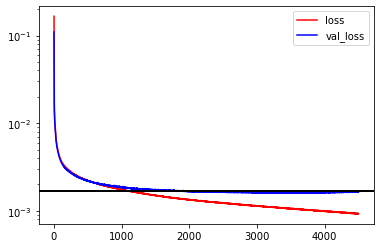

In [8]:
#Plot Training Progree
plt.plot(history.history['loss'], 'r', label='loss')
plt.yscale("log")
plt.plot(history.history['val_loss'], 'b', label='val_loss') if 'val_loss' in history.history else None
plt.legend()
plt.axhline(y=0.0017, xmin=0, xmax=5, linewidth=2, color = 'k')
plt.show()

In [9]:
#Save Trained Model
#MLmodel_name = "NN_Model_Valid_" + trainingset["PreProcessMode"] + "_Dagger_InitSet_2Iter"
#MLmodel_name = "NN_Model" + "_" + "AugVarStep_1to2StepbeforeFail_3Time_RemovebyClip_SmallThre"
MLmodel_name = "NN_Model" + "_" + "AllSet"
model.save(ML_Model_Path + MLmodel_name)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /home/jiayu/Desktop/MLP_DataSet/TimeTrack_LargeSlopeOnly_Angle_17_26//ML_Models/NN_Model_AllSet/assets


In [10]:
#Save DataSet Setttings
datasetSettings = {"Shift_World_Frame_Type":trainingset["Shift_World_Frame_Type"],
                   "VectorScaleFactor":trainingset["VectorScaleFactor"],
                   "NumPreviewSteps":trainingset["NumPreviewSteps"],
                   "Contact_Representation_Type":trainingset["Contact_Representation_Type"],
                   "TrainingLoss":history.history['loss']}
#Validation loss
datasetSettings["ValidationLoss"] = history.history['val_loss'] if 'val_loss' in history.history else None

#ProProcess
datasetSettings["PreProcessMode"] = trainingset["PreProcessMode"]
datasetSettings["Scaler_X"] = trainingset["Scaler_X"]
datasetSettings["Scaler_Y"] = trainingset["Scaler_Y"]

#Dump File
pickle.dump(datasetSettings, open(ML_Model_Path + MLmodel_name+ '/datasetSettings' +'.p', "wb"))

In [14]:
#Show Prediction Result for Training
from sklearn import preprocessing

datapoint_num = 0
y_pred_temp = model.predict(np.array([x_train[datapoint_num]]))

print(x_train[datapoint_num])

#Recover to original format
if trainingset["PreProcessMode"] == "OriginalForm":
    print("Data Kept Original Form, But need to scale back to meters")
    y_pred_originalform = y_pred_temp/trainingset["VectorScaleFactor"]
    y_true_originalform = y_train[datapoint_num]/trainingset["VectorScaleFactor"]
elif trainingset["PreProcessMode"] == "Standarization" or trainingset["PreProcessMode"] == "MaxAbs":
    y_pred_originalform = dataset["Scaler_Y"].inverse_transform(y_pred_temp)
    y_true_originalform = dataset["Scaler_Y"].inverse_transform(np.array([y_train[datapoint_num]]))
else:
    raise Exception("Unknow Pre Process Mode")


print("predicted result: \n",y_pred_originalform)
print("true value: \n",y_true_originalform)
print("diff: \n", np.absolute(y_pred_originalform - y_true_originalform))

[-1.48599792e-01 -2.20208924e-01  7.12997719e-01  1.65661720e-01
  1.34084045e-01  3.76520638e-02 -3.95726390e-07 -3.77098398e-07
 -6.08962142e-08 -3.15454892e-01 -2.20656207e-01 -7.29762884e-02
  0.00000000e+00  3.88413298e-01  8.95748497e-01  5.92720317e-14
 -1.86586702e-01  8.95748497e-01  5.92720317e-14 -1.86586702e-01
 -1.16703862e-01  5.92720317e-14  3.88413298e-01 -1.16703862e-01
  5.92720317e-14 -1.86586702e-01 -1.10938149e-01 -3.64220536e-02
 -7.61586702e-01 -9.77180109e-02 -1.19933759e-01 -7.61586702e-01
 -1.08541881e+00 -2.76289571e-01 -1.86586702e-01 -1.09863894e+00
 -1.92777866e-01  3.88413298e-01 -1.12368781e-01 -2.73847377e-02
 -1.86586702e-01 -9.62873784e-02 -1.28971075e-01 -1.86586702e-01
 -1.08398817e+00 -2.85326887e-01  3.88413298e-01 -1.10006958e+00
 -1.83740550e-01  9.63413298e-01  8.98164808e-01 -1.52638542e-02
  3.88413298e-01  8.98164808e-01 -1.52638542e-02  3.88413298e-01
 -1.19120173e-01  1.52638542e-02  9.63413298e-01 -1.19120173e-01
  1.52638542e-02  9.63413

Data Kept Original Form, But need to scale back to meters
[0.09170891 0.09184977 0.09186065 0.09191408 0.09198821 0.09200946
 0.09201758 0.09218008 0.09223082 0.09224437 0.09233674 0.09234735
 0.09235063 0.09235147 0.09238873 0.09245817 0.0925     0.09262365
 0.09264829 0.09265358 0.09287855 0.09289413 0.09292944 0.092938
 0.0929395  0.0929516  0.09303008 0.09318722 0.0932069  0.09324668
 0.09326355 0.09326862 0.09329741 0.09334811 0.0933611  0.09337436
 0.09343613 0.09349772 0.09350335 0.09355315 0.09355683 0.09385148
 0.09386413 0.09395261 0.09405845 0.0941346  0.09418798 0.09421304
 0.09425042 0.09426934 0.09427249 0.0942746  0.09432416 0.09448607
 0.09450316 0.09450323 0.09452563 0.09456101 0.09459245 0.09464027
 0.09470372 0.09470511 0.09474469 0.09475928 0.09479339 0.0947954
 0.09481919 0.09490722 0.09500289 0.09513796 0.0951753  0.09524801
 0.09532972 0.09536966 0.0953817  0.09538544 0.0954343  0.09549102
 0.09551497 0.09555263 0.09556661 0.09559835 0.09563294 0.09571142
 0.0958

(array([ 6.,  8.,  4.,  2.,  1.,  2.,  5.,  4.,  3.,  2.,  3.,  2.,  1.,
        10.,  0.,  5.,  3.,  0.,  2.,  2.,  9.,  5.,  0.,  1.,  4.,  3.,
         8.,  3.,  1.,  1.]),
 array([ 1.        ,  1.93333333,  2.86666667,  3.8       ,  4.73333333,
         5.66666667,  6.6       ,  7.53333333,  8.46666667,  9.4       ,
        10.33333333, 11.26666667, 12.2       , 13.13333333, 14.06666667,
        15.        , 15.93333333, 16.86666667, 17.8       , 18.73333333,
        19.66666667, 20.6       , 21.53333333, 22.46666667, 23.4       ,
        24.33333333, 25.26666667, 26.2       , 27.13333333, 28.06666667,
        29.        ]),
 <BarContainer object of 30 artists>)

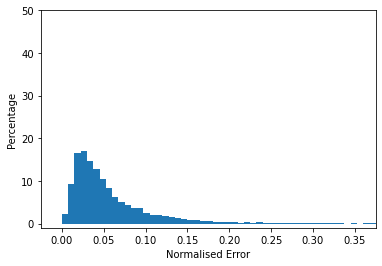

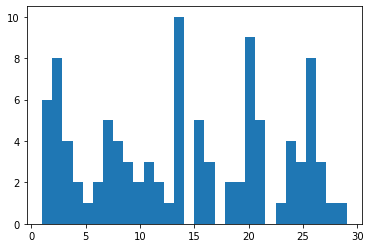

In [15]:
#Error Stat with Training Set
import matplotlib.pyplot as plt
y_pred_train = model.predict(x_train)

if trainingset["PreProcessMode"] == "OriginalForm":
    print("Data Kept Original Form, But need to scale back to meters")
    y_pred_train_originalform = y_pred_train/trainingset["VectorScaleFactor"]
    y_true_train_originalform = y_train/trainingset["VectorScaleFactor"]
elif trainingset["PreProcessMode"] == "Standarization" or trainingset["PreProcessMode"] == "MaxAbs":
    print("PreProcessing of: ", trainingset["PreProcessMode"])
    y_pred_train_originalform = trainingset["Scaler_Y"].inverse_transform(y_pred_train)
    y_true_train_originalform = trainingset["Scaler_Y"].inverse_transform(y_train)
else:
    raise Exception("Unknow Pre Process Mode")

#Compute Error
#err = np.linalg.norm(y_true_train_originalform[:,-3:]-y_pred_train_originalform[:,-3:], axis=1)
err = np.linalg.norm(y_true_train_originalform[:,-3:]-y_pred_train_originalform[:,-3:], axis=1)

#Plot Histogram
fig=plt.figure();   ax = fig.gca()
plt.hist(err, bins=50, density = True, range = (0.0, 0.375))
ax.set_xlabel("Normalised Error")
ax.set_xlim([-0.025,0.375])
ax.set_ylabel("Percentage")
ax.set_ylim([-1,50])

#### Sort the error

err_sorted = np.sort(err)
print(err_sorted[-1000:])  # print the 100 biggest error

print("Error Mean: ", err_sorted.mean())
print("Error Std", err_sorted.std())

##Plot prediction on the initial dataset
err_initdata=err[0:12000+1]

err_initdata_sorted = np.sort(err_initdata)
print(err_initdata_sorted[-100:])  # print the 100 biggest error

err_initdata_idx_sorted = np.argsort(err_initdata)
print(err_initdata_idx_sorted[-100:]%30)
selected_err=err_initdata_idx_sorted[-100:]%30
fig=plt.figure();   ax = fig.gca()
plt.hist(selected_err, bins=30)

Data Kept Original Form, But need to scale back to meters
[0.02414507 0.02485377 0.02500038 ... 2.36714018 2.39423455 2.43331314]
Error Mean:  0.14145188940895104
Error Std 0.12557107580169172


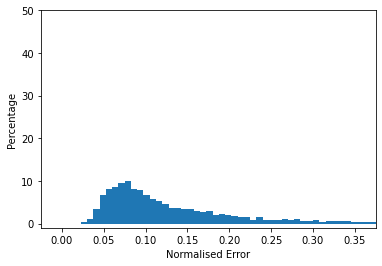

In [16]:
#Error Stat with Validation Set

y_pred_valid = model.predict(x_valid)


if validationset["PreProcessMode"] == "OriginalForm":
    print("Data Kept Original Form, But need to scale back to meters")
    y_pred_valid_originalform = y_pred_valid/validationset["VectorScaleFactor"]
    y_true_valid_originalform = y_valid/validationset["VectorScaleFactor"]
elif validationset["PreProcessMode"] == "Standarization" or validationset["PreProcessMode"] == "MaxAbs":
    print("PreProcessing of: ", validationset["PreProcessMode"])
    y_pred_valid_originalform = validationset["Scaler_Y"].inverse_transform(y_pred_valid)
    y_true_valid_originalform = validationset["Scaler_Y"].inverse_transform(y_valid)
else:
    raise Exception("Unknow Pre Process Mode")

#Compute Error
err = np.linalg.norm(y_true_valid_originalform-y_pred_valid_originalform, axis=1)

#Plot Histogram
fig=plt.figure();   ax = fig.gca()
plt.hist(err, bins=50, density = True, range = (0.0, 0.375))
ax.set_xlabel("Normalised Error")
ax.set_xlim([-0.025,0.375])
ax.set_ylabel("Percentage")
ax.set_ylim([-1,50])

#### Sort the error

err_sorted = np.sort(err)
print(err_sorted)  # print the 100 biggest error

print("Error Mean: ", err_sorted.mean())
print("Error Std", err_sorted.std())



Data Kept Original Form, But need to scale back to meters
[0.02414507 0.02485377 0.02500038 ... 2.36714018 2.39423455 2.43331314]
Error Mean:  0.14145188940895104
Error Std 0.12557107580169172


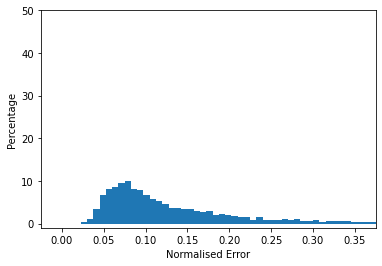

In [17]:
#Error Stat with Test Set

y_pred_test = model.predict(x_test)


if testset["PreProcessMode"] == "OriginalForm":
    print("Data Kept Original Form, But need to scale back to meters")
    y_pred_test_originalform = y_pred_test/testset["VectorScaleFactor"]
    y_true_test_originalform = y_test/testset["VectorScaleFactor"]
elif testset["PreProcessMode"] == "Standarization" or testset["PreProcessMode"] == "MaxAbs":
    print("PreProcessing of: ", validationset["PreProcessMode"])
    y_pred_test_originalform = validationset["Scaler_Y"].inverse_transform(y_pred_test)
    y_true_test_originalform = validationset["Scaler_Y"].inverse_transform(y_test)
else:
    raise Exception("Unknow Pre Process Mode")

#Compute Error
err = np.linalg.norm(y_pred_test_originalform-y_true_test_originalform, axis=1)

#Plot Histogram
fig=plt.figure();   ax = fig.gca()
plt.hist(err, bins=50, density = True, range = (0.0, 0.375))
ax.set_xlabel("Normalised Error")
ax.set_xlim([-0.025,0.375])
ax.set_ylabel("Percentage")
ax.set_ylim([-1,50])

#### Sort the error

err_sorted = np.sort(err)
print(err_sorted)  # print the 100 biggest error

print("Error Mean: ", err_sorted.mean())
print("Error Std", err_sorted.std())